## Outlier Detection Techniques

In [1]:
# importing dependencies here
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(os.path.join("data", "datafile.csv"))

In [3]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
1,Perch,110.0,20.0,22.0,23.5,5.5225,3.9950
2,Roach,160.0,20.5,22.5,25.3,7.0334,3.8203
3,Parkki,60.0,14.3,15.5,17.4,6.5772,2.3142
4,Bream,700.0,30.4,33.0,38.3,14.8604,5.2854


In [4]:
data.info

<bound method DataFrame.info of     Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
1     Perch   110.0     20.0     22.0     23.5   5.5225  3.9950
2     Roach   160.0     20.5     22.5     25.3   7.0334  3.8203
3    Parkki    60.0     14.3     15.5     17.4   6.5772  2.3142
4     Bream   700.0     30.4     33.0     38.3  14.8604  5.2854
..      ...     ...      ...      ...      ...      ...     ...
106   Perch   197.0     23.5     25.6     27.0   6.5610  4.2390
107  Parkki   140.0     19.0     20.7     23.2   8.5376  3.2944
108   Roach   110.0     19.1     20.8     23.1   6.1677  3.3957
109   Perch   685.0     34.0     36.5     39.0  10.8810  6.8640
110   Perch   300.0     26.9     28.7     30.1   7.5852  4.6354

[111 rows x 7 columns]>

In [5]:
data.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [6]:
numerical = ["Weight", "Length1", "Length2", "Length3", "Height", "Width"]

## Interquartile Range

In [7]:
# for independent features
for col in numerical:
    df = data[col]
    df_Q1 = df.quantile(0.25)
    df_Q3 = df.quantile(0.75)
    df_IQR = df_Q3 - df_Q1
    df_lowerend = df_Q1 - (1.5 * df_IQR)
    df_upperend = df_Q3 + (1.5 * df_IQR)
    
    df_outliers = df[(df < df_lowerend) | (df > df_upperend)]
    print(df_outliers)

13    1550.0
Name: Weight, dtype: float64
13    56.0
Name: Length1, dtype: float64
13    60.0
Name: Length2, dtype: float64
Series([], Name: Length3, dtype: float64)
Series([], Name: Height, dtype: float64)
Series([], Name: Width, dtype: float64)


In [8]:
# for target variable
df = data["Weight"]
df_Q1 = df.quantile(0.25)
df_Q3 = df.quantile(0.75)
df_IQR = df_Q3 - df_Q1
df_lowerend = df_Q1 - (1.5 * df_IQR)
df_upperend = df_Q3 + (1.5 * df_IQR)

df_outliers = df[(df < df_lowerend) | (df > df_upperend)]
print(df_outliers)

13    1550.0
Name: Weight, dtype: float64


## Z-Score

In [9]:
# for independent features
threshold = 3
for col in numerical:
    mean = np.mean(data[col])
    std = np.std(data[col])
    
    for i in data[col]:
        z_score = (i - mean) / std
        if np.abs(z_score) > threshold:
            print(f"{col} Row Index {(data[data[col]==i].index.values)}, Value {i}")
    

Weight Row Index [13], Value 1550.0
Length1 Row Index [13], Value 56.0
Length2 Row Index [13], Value 60.0


In [10]:
# for target variable
threshold = 3
mean = np.mean(data["Weight"])
std = np.std(data["Weight"])

for i in data["Weight"]:
    z_score = (i - mean) / std
    if np.abs(z_score) > threshold:
        print(data[data["Weight"] == i])

   Species  Weight  Length1  Length2  Length3  Height  Width
13    Pike  1550.0     56.0     60.0     64.0     9.6  6.144


## DBSCAN

In [11]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

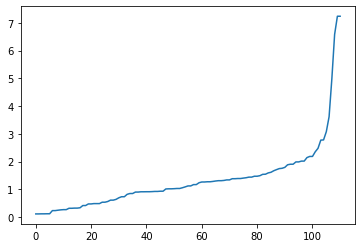

In [12]:
# for independent features
nearest_neighbors = NearestNeighbors(n_neighbors=5)
X = data[["Length1", "Length2", "Length3", "Height", "Width"]]
nearest_neighbors.fit(X)
distances, indices = nearest_neighbors.kneighbors(X)
distances = np.sort(distances, axis=0)[:, 1]
plt.plot(distances)
plt.show()

In [13]:
# for independent features
numerical = ["Length1", "Length2", "Length3", "Height", "Width"]
for col in numerical:
    db = DBSCAN(eps=4, min_samples=4)
    db.fit_predict(data[col].values.reshape(-1,1))
    print(data[db.labels_==-1])


   Species  Weight  Length1  Length2  Length3   Height   Width
13    Pike  1550.0     56.0     60.0     64.0   9.6000  6.1440
84    Pike  1250.0     52.0     56.0     59.7  10.6863  6.9849
   Species  Weight  Length1  Length2  Length3   Height   Width
13    Pike  1550.0     56.0     60.0     64.0   9.6000  6.1440
84    Pike  1250.0     52.0     56.0     59.7  10.6863  6.9849
   Species  Weight  Length1  Length2  Length3   Height   Width
13    Pike  1550.0     56.0     60.0     64.0   9.6000  6.1440
84    Pike  1250.0     52.0     56.0     59.7  10.6863  6.9849
Empty DataFrame
Columns: [Species, Weight, Length1, Length2, Length3, Height, Width]
Index: []
Empty DataFrame
Columns: [Species, Weight, Length1, Length2, Length3, Height, Width]
Index: []


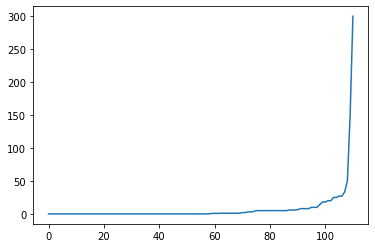

In [14]:
# for target variable
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=5)
X = data[["Weight"]]
nearest_neighbors.fit(X)
distances, indices = nearest_neighbors.kneighbors(X)
distances = np.sort(distances, axis=0)[:, 1]
plt.plot(distances)
plt.show()

In [15]:
# for target variable
db = DBSCAN(eps=50, min_samples=5)
X = data[["Weight"]] 
db.fit_predict(X)
print(X[db.labels_==-1])

    Weight
13  1550.0
24  1100.0
63  1100.0
84  1250.0


## Isolation Forest

In [16]:
from sklearn.ensemble import IsolationForest

In [17]:
# for independent features
for col in numerical:
    clf = IsolationForest(n_estimators=30, max_samples="auto", random_state=42, contamination=.1)
    X = data[[col]]
    y_pred = clf.fit_predict(data[col].values.reshape(-1,1))
    print(X[y_pred == -1])

     Length1
3       14.3
8        9.3
13      56.0
28      10.0
35      43.2
36      44.8
43      48.3
59      42.0
71      12.9
84      52.0
105      7.5
     Length2
3       15.5
8        9.8
13      60.0
28      10.5
35      46.0
36      48.0
43      51.7
59      45.0
71      14.1
84      56.0
105      8.4
     Length3
5       16.0
8       10.8
13      64.0
28      11.6
33      12.0
36      51.2
43      55.1
49      15.2
84      59.7
99      13.5
105      8.8
      Height
5     3.8240
8     1.7388
10   18.7542
27    4.5880
47   15.9936
49    2.8728
60   18.0369
70   18.6354
71    4.1472
99    2.4300
101  18.9570
      Width
8    1.0476
18   1.1659
33   1.3800
41   8.1420
44   7.7957
49   2.0672
63   7.4165
78   1.1484
80   7.4934
99   1.2690
105  1.4080


In [18]:
# for target variable
clf = IsolationForest(n_estimators=20, max_samples="auto", random_state=42, contamination=.1)
X = data[["Weight"]] 
y_pred = clf.fit_predict(X)
print(X[y_pred == -1])

     Weight
13   1550.0
20     85.0
24   1100.0
36    770.0
43    950.0
49     19.7
63   1100.0
70    975.0
84   1250.0
99     13.4
105     5.9
